# EFlux2 on Isoprenol proteomics

In [1]:
import cobra
import pandas as pd
import numpy as np

import sys

source_dir = './src_isoprenol'
sys.path.append(source_dir)

from utils import *
from cobra_functions import get_EFlux2_solution
from plot import *

import importlib
import p_to_f_functions


In [2]:
model = cobra.io.load_json_model('./data/iJN1463_IPP_bypass.json')
model.solver = 'glpk'

In [3]:
prot_df = pd.read_csv('./data/top3_norm.csv', index_col=0)
prot_df

,EF_1364,MM_1762,PP_0001,PP_0002,PP_0003,PP_0004,PP_0005,PP_0006,PP_0010,PP_0011,...,PP_5416,PP_5417,SPy_1046,YNR043W,aacc1,b4055 JW4015,mvas,neo,pp_0985,isoprenol
line_cycle,,,,,,,,,,,,,,,,,,,,,
Control_P1_c1,0.986442,0.996212,0.804532,0.798283,0.940104,0.993831,0.831845,1.027250,1.034617,0.988453,...,0.971655,1.042076,0.847835,0.904019,0.985276,0.832242,0.986722,0.935378,0.830235,1.035061
Control_P1_c2,1.072973,1.063614,1.373134,1.607970,1.538446,1.337231,1.489408,0.998225,0.976788,1.072751,...,1.056575,0.899179,1.543061,1.086586,0.957408,1.393086,1.207033,0.941409,1.436213,0.996014
Control_P1_c3,1.059396,1.158934,0.983655,1.537049,1.119695,1.080408,1.107023,1.141252,1.115213,1.066972,...,1.192216,0.969521,1.433030,1.146478,0.923035,0.998218,1.032193,1.207679,0.890906,1.008840
Control_P2_c1,1.079864,1.006244,0.962694,1.123301,1.027392,0.999546,0.819143,1.092425,1.081918,0.993325,...,1.228304,1.015047,0.879854,1.002215,1.024511,0.926112,1.057093,0.984888,0.840157,0.941282
Control_P2_c2,0.786783,0.980890,1.176323,1.561452,1.340543,1.052278,1.384072,1.020434,0.903363,1.090488,...,1.123195,0.959308,1.033883,1.071468,1.019966,1.045819,0.798429,1.100613,1.146189,0.908279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PP_5335_c0,0.958525,0.848349,0.972577,0.337012,0.881060,0.930277,1.070881,0.847210,0.575432,0.336909,...,0.839042,0.949728,0.012118,0.983790,0.863663,0.727582,0.756293,1.089610,0.738629,1.246390
PP_5416_c0,2.891744,1.497600,0.988870,0.795043,0.657311,0.522007,1.111307,0.670097,0.451795,0.482794,...,1.184444,1.473730,0.005507,1.652450,0.000115,0.637753,1.580731,0.916672,0.750113,0.871439
PP_5417_c0,0.813046,0.923142,1.173493,0.480751,1.033137,1.033012,1.208424,0.909694,0.537622,0.553047,...,0.831761,0.860456,0.011998,0.897321,0.512252,0.849066,0.720171,1.135858,1.125707,1.177884


In [4]:
gene_id_list = [g.id for g in model.genes]
pp_genes = [g for g in model.genes if g.id[0:3] == 'PP_']
print(f'There are N = {len(pp_genes)} PP_XXXX genes in the model')
pp_genes[10]

There are N = 1445 PP_XXXX genes in the model


Gene identifier,PP_0878
Name,dppF
Memory address,0x16aac5f10
Functional,True
In 23 reaction(s),"LEULEUabcpp, ALAALAabcpp, GLYSERabcpp, CARNabcpp, BALAALAabcpp, ALAHISabcpp, ALALEUabcpp, GLYGLUabcpp, BLAMDabcpp, CGLYabcpp, HISHISabcpp, ALAGLUabcpp, GLYPHEabcpp, HISGLYabcpp, GLYMETabcpp,..."


In [5]:
non_pp_genes = [g for g in model.genes if g.id[0:3] != 'PP_']
non_pp_gene_ids = [g.id for g in model.genes if g.id[0:3] != 'PP_']

print(f'There are N = {len(non_pp_genes)} non-PP_XXXX genes in the model')
print(non_pp_gene_ids)

There are N = 5 non-PP_XXXX genes in the model
['HMGS', 'HMGR', 'MK', 'PMD', 'AphA']


The following heterologous genes are in the GSM:
- HMGS: HMG-CoA synthase = MvaS
- HMGR: HMG-CoA reductase = MvaE/EF_1364
- MK: Mevalonate Kinase = MM_1762
- PMD: Phosphomevalonate decarboxylase = YNR043W
- AphA: IP phosphatase = b4055 JW4015

The following non-putida proteins are in the proteomics data:
- MM_1762: Mevalonate kinase | MK
- SPy_1046: dCas9
- YNR043W: MVD1/Mevalonate Pyrophosphate Decarboxylase | PMD 
- aacc1: gent resistance 
- b4055 JW4015: aphA in E. coli | AphA
- mvas: HMG-CoA synthase | HMGS
- neo: kanamycin resistance
- mvae: HMG-CoA reductase | HMGR | EF_1364

Need to replace the column name for each non-PP protein measurement with its name in the GSM dataframe. 

In [6]:
non_pp_prot = [p for p in prot_df.columns if p.lower()[:3] != 'pp_']
non_pp_prot

['EF_1364',
 'MM_1762',
 'SPy_1046',
 'YNR043W',
 'aacc1',
 'b4055 JW4015',
 'mvas',
 'neo',
 'isoprenol']

In [7]:
columns_to_update = {
    'mvas':'HMGS',
    'EF_1364':'HMGR',
    'MM_1762': 'MK',
    'YNR043W': 'PMD',
    'b4055 JW4015': 'AphA'
}
prot_df = pd.read_csv('./data/top3_norm.csv', index_col=0)
assert all([proteomics_name in prot_df.columns for proteomics_name in list(columns_to_update.keys())]), 'One or more proteomics_name in columns_to_update is not in prot_df'
assert all([gsm_id in gene_id_list for gsm_id in list(columns_to_update.values())]), 'One or more gsm_ids in columns_to_update not in GSM'
prot_df = prot_df.rename(columns = columns_to_update)

## Check how many GSM genes are measured

In [8]:
gene_in_model_not_measured = [g for g in gene_id_list if g not in list(prot_df.columns)]
print(f'There are N = {len(gene_in_model_not_measured)} genes in the model that are not measured')

There are N = 830 genes in the model that are not measured


In [9]:
gene_measured_not_in_model = [g for g in list(prot_df.columns) if g not in gene_id_list]
print(f'There are N = {len(gene_measured_not_in_model)} genes in the proteomics data that are not in the model')

There are N = 782 genes in the proteomics data that are not in the model


## Run EFlux2 on different strains

In [10]:
prot_df

,HMGR,MK,PP_0001,PP_0002,PP_0003,PP_0004,PP_0005,PP_0006,PP_0010,PP_0011,...,PP_5416,PP_5417,SPy_1046,PMD,aacc1,AphA,HMGS,neo,pp_0985,isoprenol
line_cycle,,,,,,,,,,,,,,,,,,,,,
Control_P1_c1,0.986442,0.996212,0.804532,0.798283,0.940104,0.993831,0.831845,1.027250,1.034617,0.988453,...,0.971655,1.042076,0.847835,0.904019,0.985276,0.832242,0.986722,0.935378,0.830235,1.035061
Control_P1_c2,1.072973,1.063614,1.373134,1.607970,1.538446,1.337231,1.489408,0.998225,0.976788,1.072751,...,1.056575,0.899179,1.543061,1.086586,0.957408,1.393086,1.207033,0.941409,1.436213,0.996014
Control_P1_c3,1.059396,1.158934,0.983655,1.537049,1.119695,1.080408,1.107023,1.141252,1.115213,1.066972,...,1.192216,0.969521,1.433030,1.146478,0.923035,0.998218,1.032193,1.207679,0.890906,1.008840
Control_P2_c1,1.079864,1.006244,0.962694,1.123301,1.027392,0.999546,0.819143,1.092425,1.081918,0.993325,...,1.228304,1.015047,0.879854,1.002215,1.024511,0.926112,1.057093,0.984888,0.840157,0.941282
Control_P2_c2,0.786783,0.980890,1.176323,1.561452,1.340543,1.052278,1.384072,1.020434,0.903363,1.090488,...,1.123195,0.959308,1.033883,1.071468,1.019966,1.045819,0.798429,1.100613,1.146189,0.908279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PP_5335_c0,0.958525,0.848349,0.972577,0.337012,0.881060,0.930277,1.070881,0.847210,0.575432,0.336909,...,0.839042,0.949728,0.012118,0.983790,0.863663,0.727582,0.756293,1.089610,0.738629,1.246390
PP_5416_c0,2.891744,1.497600,0.988870,0.795043,0.657311,0.522007,1.111307,0.670097,0.451795,0.482794,...,1.184444,1.473730,0.005507,1.652450,0.000115,0.637753,1.580731,0.916672,0.750113,0.871439
PP_5417_c0,0.813046,0.923142,1.173493,0.480751,1.033137,1.033012,1.208424,0.909694,0.537622,0.553047,...,0.831761,0.860456,0.011998,0.897321,0.512252,0.849066,0.720171,1.135858,1.125707,1.177884


In [11]:
LINE_CYCLE = 'Control_P1_c3'
proteomics_for_eflux2 = pd.DataFrame(prot_df.loc[LINE_CYCLE, :].transpose())


In [12]:
# import kindl.plot_multioutput as plot_multioutput


In [13]:
importlib.reload(p_to_f_functions)
# p_to_f_functions.Max_Isoprenol(model, proteomics_for_eflux2, 0.8, verbose = False)

<module 'p_to_f_functions' from '/Users/pckinnunen/Documents/GitHub/Isoprenol_CRISPRi/DavidCarruthers/ml/cobrapy/./src_isoprenol/p_to_f_functions.py'>

In [14]:
worst_titer_strain = prot_df['isoprenol'].sort_values(ascending = True).head(10).index[9]
best_titer_strain = prot_df['isoprenol'].sort_values(ascending = False).head(1).index[0]
control_strain = 'Control_P1_c3'

In [15]:
for strain in [worst_titer_strain, control_strain, best_titer_strain]:
    print(f"strain: {strain}\ttiter: {prot_df.loc[strain, 'isoprenol']}")

strain: PP_4679_c0	titer: 0.3826645729283955
strain: Control_P1_c3	titer: 1.0088396857417432
strain: PP_0751_PP_0814_c2	titer: 3.0666529632787665


In [16]:
prot_df['isoprenol']

line_cycle
Control_P1_c1    1.035061
Control_P1_c2    0.996014
Control_P1_c3    1.008840
Control_P2_c1    0.941282
Control_P2_c2    0.908279
                   ...   
PP_5335_c0       1.246390
PP_5416_c0       0.871439
PP_5417_c0       1.177884
PP_5419_c0       2.276676
PP_5420_c0       0.522690
Name: isoprenol, Length: 304, dtype: float64

In [17]:
fba_list = []
mi_list = []
for strain in [worst_titer_strain, control_strain, best_titer_strain]:
    print(f"strain: {strain}\ttiter: {prot_df.loc[strain, 'isoprenol']}")
    proteomics_for_eflux2 = pd.DataFrame(prot_df.loc[strain, :].transpose())

    mi, fba = p_to_f_functions.Max_Isoprenol(model, proteomics_for_eflux2, 0.8, verbose = False)
    fba_list.append(fba)
    mi_list.append(mi)

strain: PP_4679_c0	titer: 0.3826645729283955
FBA status optimal
FBA solution 0.022874751536677545
Max Isoprenol status optimal
Max Isoprenol solution 0.1330349367684499

strain: Control_P1_c3	titer: 1.0088396857417432
FBA status optimal
FBA solution 0.03128472561890171
Max Isoprenol status optimal
Max Isoprenol solution 0.19988428289700333

strain: PP_0751_PP_0814_c2	titer: 3.0666529632787665
FBA status optimal
FBA solution 0.020590184746633496
Max Isoprenol status optimal
Max Isoprenol solution 0.13578622827334555



In [18]:
mi_list[1].to_frame()

,fluxes,reduced_costs
3HAD160,0.004202,0.000000e+00
13DAMPPabcpp,0.000000,4.440892e-16
13DAMPPtex,0.000000,0.000000e+00
15DAPabcpp,0.000000,4.440892e-16
1P2CBXLCYCL,0.000000,0.000000e+00
...,...,...
PMD,0.199884,-8.881784e-16
IPMPP,0.199884,0.000000e+00
IPOHtrpp,-0.199884,-0.000000e+00
IPOHtex,-0.199884,-0.000000e+00


In [19]:
proteomics_for_eflux2.loc['isoprenol',:]

PP_0751_PP_0814_c2    3.066653
Name: isoprenol, dtype: float64

In [20]:
fba_list = []
mi_list = []
norm_iso_export_list = []
measured_iso_list = []
cell_line_list = []
for i, strain in enumerate(list(prot_df.index)):
    print(f"i = {i}/{len(prot_df.index)}\tstrain: {strain}\ttiter: {prot_df.loc[strain, 'isoprenol']}")
    proteomics_for_eflux2 = pd.DataFrame(prot_df.loc[strain, :].transpose())

    mi, fba = p_to_f_functions.Max_Isoprenol(model, proteomics_for_eflux2, 0.8, verbose = False)
    fba_list.append(fba)
    mi_list.append(mi)
    mi_df = mi.to_frame()
    normalized_isoprenol_export = mi_df.loc['EX_isoprenol_e', 'fluxes']/-mi_df.loc['EX_glc__D_e', 'fluxes']
    norm_iso_export_list.append(normalized_isoprenol_export)
    measured_iso_list.append(proteomics_for_eflux2.loc['isoprenol', :].values[0])
    cell_line_list.append(strain)
pred_df = pd.DataFrame.from_dict(
    {
        'strain': cell_line_list,
        'normalized_isoprenol_prediction': norm_iso_export_list,
        'measured_isoprenol': measured_iso_list
    }
)
pred_df.to_csv('strain_predictions.csv')

i = 0/304	strain: Control_P1_c1	titer: 1.035061206963365
FBA status optimal
FBA solution 0.030147548360903817
Max Isoprenol status optimal
Max Isoprenol solution 0.14747844751395597

i = 1/304	strain: Control_P1_c2	titer: 0.9960144089741382
FBA status optimal
FBA solution 0.02810351649111292
Max Isoprenol status optimal
Max Isoprenol solution 0.18498084724268926

i = 2/304	strain: Control_P1_c3	titer: 1.0088396857417432
FBA status optimal
FBA solution 0.03128472561890171
Max Isoprenol status optimal
Max Isoprenol solution 0.19988428289700333

i = 3/304	strain: Control_P2_c1	titer: 0.941281988121512
FBA status optimal
FBA solution 0.02593629152552433
Max Isoprenol status optimal
Max Isoprenol solution 0.17796846508857547

i = 4/304	strain: Control_P2_c2	titer: 0.9082791945831992
FBA status optimal
FBA solution 0.029657932889997168
Max Isoprenol status optimal
Max Isoprenol solution 0.20350545446864393

i = 5/304	strain: Control_P2_c3	titer: 1.0363959709315556
FBA status optimal
FBA solu

In [21]:
import seaborn as sns


<Axes: xlabel='normalized_isoprenol_prediction', ylabel='measured_isoprenol'>

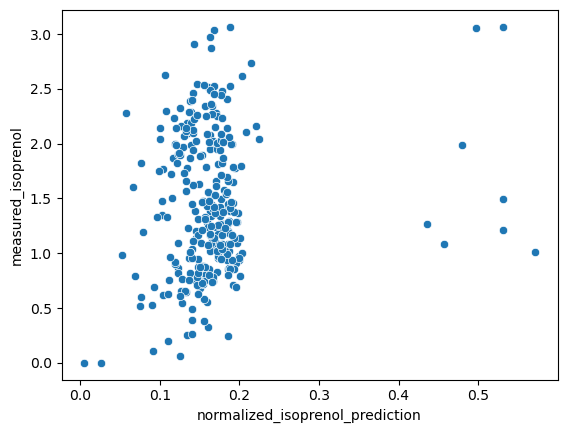

In [23]:
sns.scatterplot(data = pred_df,
                x = 'normalized_isoprenol_prediction',
                y = 'measured_isoprenol'
               )

In [25]:
pred_df.sort_values('normalized_isoprenol_prediction', ascending = False)

,strain,normalized_isoprenol_prediction,measured_isoprenol
10,Control_P4_c2,0.571417,1.011342
168,PP_0815_PP_1317_c2,0.531808,3.066220
49,PP_0437_PP_1769_c2,0.531790,1.491204
36,PP_0368_PP_1769_c2,0.530591,1.215054
184,PP_1317_c2,0.497819,3.058619
...,...,...,...
181,PP_1240_c0,0.066495,1.607828
302,PP_5419_c0,0.057709,2.276676
193,PP_1444_c0,0.052233,0.986308
212,PP_1777_c0,0.025686,0.000058
